# SMAI

## Assignment 5

### Question 2
### Hidden Markov Models

In this assignment, we will be implementing the hidden markov model using sklearn. Let us firt take a look at the given dataset of die rolls. 

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn import hmm
import random

In [226]:
rolls = np.load('rolls.npy')
train_data, validation_data = rolls[:25000], rolls[25000, :]
print('Shape of the rolls:',rolls.shape)

Shape of the rolls: (50000, 1)


Now let us train the hmm model and then test it on the validation state with different emission probabilities

In [337]:
model = hmm.CategoricalHMM(n_components=2, n_iter=2000, random_state=13, init_params='')

Now let us validate the best model for different emission probabilities

In [338]:
best_score = float('-inf')
best_model = None

for p in range(1, 6):
    loaded_emission_probs = [1/p]*p + [1/(6 - p)]*(6 - p)
    loaded_emission_probs /= np.sum(loaded_emission_probs)
    fair_emission_probs = [1/6]*6

    model.emissionprob_ = np.array([loaded_emission_probs, fair_emission_probs])
    model.startprob_ = np.array([0, 1])

    model.fit(train_data.reshape(-1, 1))

    score = model.score(validation_data.reshape(-1, 1))

    if score > best_score:
        best_score = score
        best_model = model

Now the best_model contains the model having the best set of emission probabilities. Let us make the predictions and plot them.

In [339]:
print(best_model.transmat_)
print(best_model.emissionprob_)
print(best_model.startprob_)
predicted_states = best_model.predict(rolls.reshape(-1, 1))

[[0.80846779 0.19153221]
 [0.16444229 0.83555771]]
[[0.10235861 0.10990658 0.09884566 0.10266109 0.10651109 0.47971698]
 [0.16859217 0.16099851 0.17227646 0.16521055 0.16859596 0.16432635]]
[0. 1.]


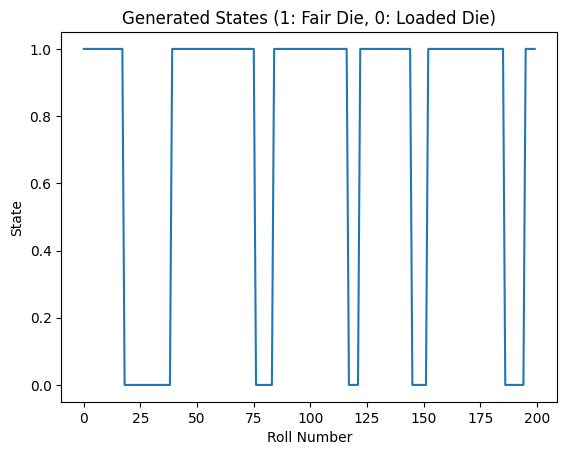

In [340]:
plt.plot(predicted_states[:200])
plt.title('Generated States (1: Fair Die, 0: Loaded Die)')
plt.xlabel('Roll Number')
plt.ylabel('State')
plt.show()

### 3.4.2
### Question 4

The problem in Hidden Markov Models that this task corresponds to is the Decoding Problem, where we want to find the most likely sequence of hidden states given the observed sequence. In this case, we want to find the most likely sequence of switching between the fair and loaded die states based on the observed rolls.

### 3.4.3
### Question 1

The frequency at which the casino switches between the fair and loaded die can be estimated based on the most likely sequence of hidden states predicted by the Hidden Markov Model (HMM). By analyzing the sequence of states, you can observe how often transitions occur from the fair to loaded die and vice versa

In [341]:
switch_count = np.sum(np.diff(predicted_states) != 0)
switch_freq = switch_count / (len(predicted_states) - 1)

print(f'Switching frequency: {switch_freq*100} %')
print(f'Switching Count: {switch_count}/50000')

Switching frequency: 4.1340826816536325 %
Switching Count: 2067/50000




### Question 2

The task of estimating the switching frequency corresponds to the State Estimation problem in Hidden Markov Models. Given the observed sequence (emission sequence), the goal is to find the most likely sequence of hidden states (fair or loaded die states).

### 3.4.4

### Question 1

The bias in the loaded die can be inferred from the emission probabilities assigned to it by the Hidden Markov Model (HMM). In the context of HMMs, the emission probabilities represent the likelihood of observing each outcome (face of the die) given the hidden state (fair or loaded die). The bias in the loaded die is reflected in these emission probabilities.

In [343]:
print(f'Emission Probabilities of the loaded die is: {best_model.emissionprob_[1]}')

Emission Probabilities of the loaded die is: [0.16859217 0.16099851 0.17227646 0.16521055 0.16859596 0.16432635]


### Question 2

The task of estimating the bias in the loaded die corresponds to the Parameter Estimation problem in Hidden Markov Models. In particular, it involves estimating the emission probabilities associated with each hidden state (fair or loaded die).

### 3.5

In this question we will model a HMM for virat and rohit to predict the number of runs made by each player.

In [348]:
runs = np.load('runs.npy')
print(runs.shape)
runs[runs==6] = 5

(30000, 1)


Now let us train the HMM model on the dataset thay have given to us

In [351]:
model = hmm.CategoricalHMM(n_components=2, n_iter = 200000, random_state=13, init_params='se')

model.transmat_ =np.array([[0.7, 0.3], [0.3, 0.7]])
model.fit(runs)


print('Start probabilities:')
print(model.startprob_)
print('Transition probabilities:')
print(model.transmat_)
print('Emission probabilities:')
print(model.emissionprob_)

Start probabilities:
[3.43333411e-53 1.00000000e+00]
Transition probabilities:
[[0.73161429 0.26838571]
 [0.43589437 0.56410563]]
Emission probabilities:
[[0.09804722 0.10538237 0.10772042 0.05168286 0.35991545 0.27725168]
 [0.1695564  0.35470124 0.28950465 0.04236918 0.0813893  0.06247924]]


In [347]:
predicted_states = model.predict(runs)
first_ball_player = "Rohit" if predicted_states[0] == 0 else "Virat"
last_ball_player = "Rohit" if predicted_states[-1] == 0 else "Virat"

print("\nPredicted player for the first ball:", first_ball_player)
print("Predicted player for the last ball:", last_ball_player)


Predicted player for the first ball: Virat
Predicted player for the last ball: Rohit
